# Bike sharing

## Data import

In [39]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('bike_sharing_model.csv')

In [41]:
df.shape

(12226, 15)

In [42]:
df.sample(10)

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5993     11085  2012-04-12       2   1     4   1        0        4   
1221      7356  2011-11-08       4   0    11   2        0        2   
4182     14998  2012-09-22       3   1     9   2        0        6   
9858      3277  2011-05-21       2   0     5  10        0        6   
7788     12485  2012-06-09       2   1     6   9        0        6   
4009     15241  2012-10-02       4   1    10   5        0        2   
9694      9250  2012-01-26       1   1     1   7        0        4   
11669    11138  2012-04-14       2   1     4   6        0        6   
9706      6953  2011-10-22       4   0    10   7        0        6   
4437     17222  2012-12-25       1   1    12  10        1        2   

       workingday  weathersit  temp   atemp   hum  windspeed  cnt  
5993            1           1  0.32  0.3030  0.66     0.2239    9  
1221            1           1  0.32  0.3485  0.87     0.0000    1  
4182            0           1  0.56  0.5303  0.88     0.2537   83  
9858            0           1  0.62  0.6061  0.61     0.1045  323  
7788            0           1  0.64  0.6212  0.57     0.1642  340  
4009            1           2  0.56  0.5303  0.83     0.1343   43  
9694            1           2  0.28  0.3030  0.81     0.0896  239  
11669           0           1  0.34  0.3333  0.76     0.1642   21  
9706            0           1  0.36  0.3636  0.76     0.1045   57  
4437            0           1  0.28  0.3182  0.81     0.0000   32

In [43]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## Split categorical/continuos variables

In [44]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [45]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [46]:
df_categorical=df[['season', 'mnth', 'hr', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']]
df_categorical.head()

season  mnth  hr  yr  holiday  weekday  workingday  weathersit
0       3     9   7   0        0        6           0           2
1       1     1  10   1        1        1           0           2
2       3     8  16   0        0        2           1           1
3       4    11   9   1        0        2           1           3
4       3     8  18   0        0        1           1           1

In [47]:
df_numerical=df[['temp', 'atemp', 'hum', 'windspeed','cnt']]
df_numerical.head()

temp   atemp   hum  windspeed  cnt
0  0.46  0.4545  0.77     0.1940   37
1  0.14  0.1364  0.59     0.1940  126
2  0.72  0.6515  0.32     0.1343  444
3  0.32  0.3030  0.81     0.3284  110
4  0.70  0.6515  0.65     0.1940  483

## Categorical data

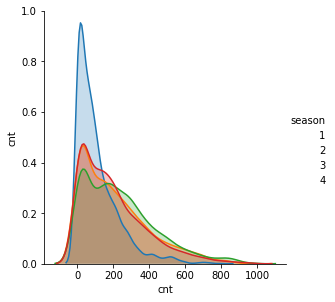

In [48]:
sns.pairplot(data=df[["season","cnt"]], hue="season", height=4)

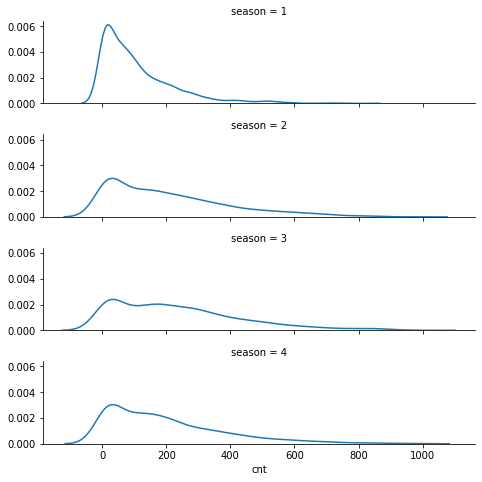

In [49]:
g = sns.FacetGrid(df, row="season", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "cnt")

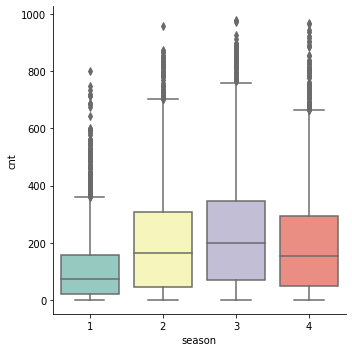

In [50]:
sns.catplot(data=df, x="season", y="cnt",kind="box", palette="Set3")

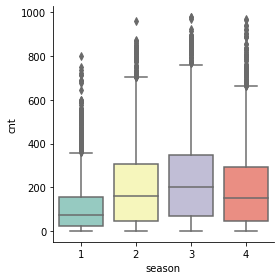

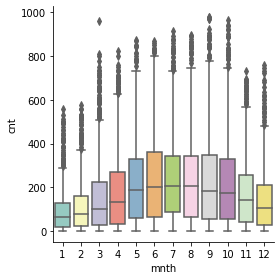

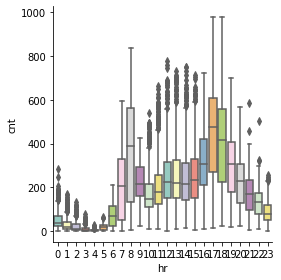

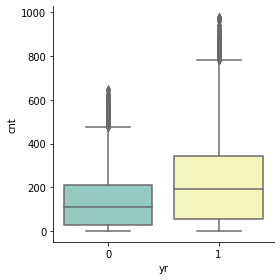

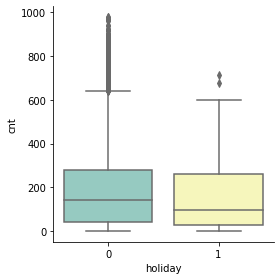

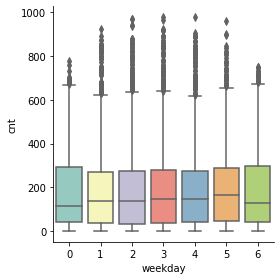

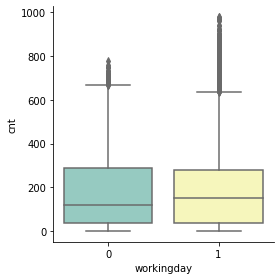

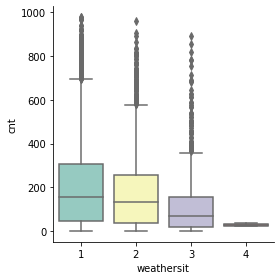

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y="cnt",
            kind="box", palette="Set3",height=4);
plt.show()



In [52]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

season_2  season_3  season_4  mnth_10  mnth_11  mnth_12  mnth_2  \
12221         0         0         1        0        0        0       0   
12222         1         0         0        0        0        0       0   
12223         0         0         1        0        0        0       0   
12224         0         0         0        0        0        0       0   
12225         0         1         0        0        0        0       0   

       mnth_3  mnth_4  mnth_5  ...  weekday_1  weekday_2  weekday_3  \
12221       0       0       0  ...          0          0          0   
12222       0       1       0  ...          0          0          0   
12223       0       0       0  ...          0          0          0   
12224       1       0       0  ...          0          0          0   
12225       0       0       0  ...          0          0          1   

       weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  \
12221          0          0          1             0             1   
12222          0          0          0             0             0   
12223          0          0          0             0             0   
12224          0          0          1             0             0   
12225          0          0          0             1             1   

       weathersit_3  weathersit_4  
12221             0             0  
12222             1             0  
12223             0             0  
12224             0             0  
12225             0             0  

[5 rows x 49 columns]

## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f5f7a450>,
      dtype=object)

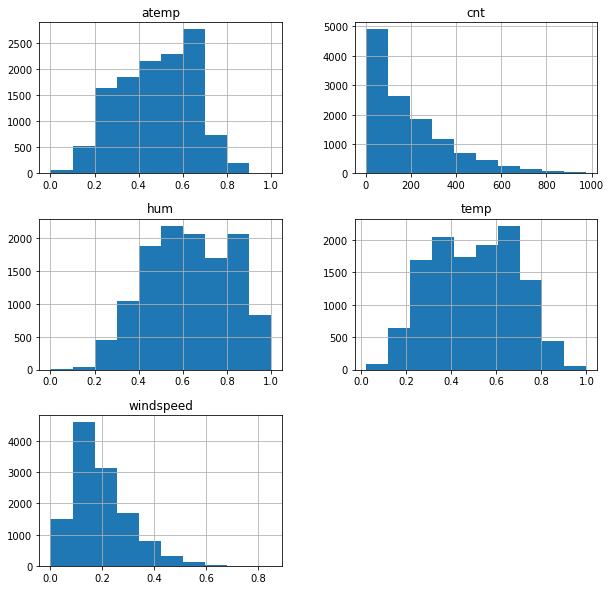

In [53]:
df_numerical.hist(figsize=(10,10))

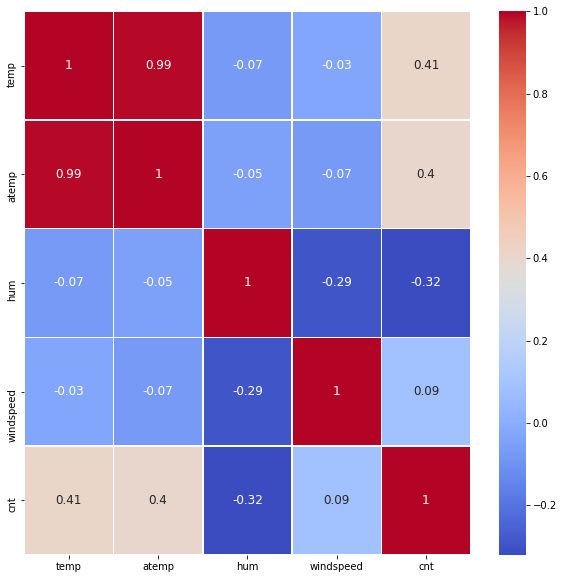

In [54]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

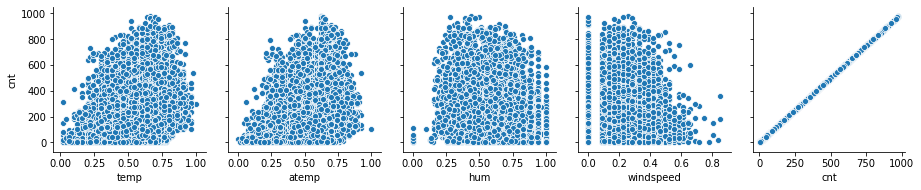

In [55]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='cnt')

In [56]:
df_numerical=df_numerical.drop(["temp"], axis=1)

## Standarize

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

atemp       hum  windspeed       cnt
0 -0.130057  0.736673   0.030371 -0.841536
1 -1.991066 -0.200437   0.030371 -0.347996
2  1.022470 -1.606103  -0.459190  1.415443
3 -1.016391  0.944920   1.132498 -0.436722
4  1.022470  0.111933   0.030371  1.631713

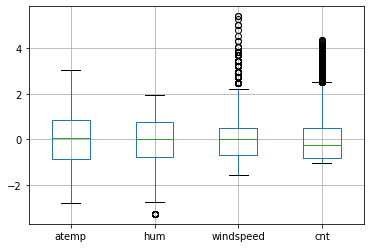

In [58]:
scaled_df.boxplot()

In [59]:
X_numerical=scaled_df.iloc[:,:-1]

In [60]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(12226, 49)
(12226, 3)


season_2  season_3  season_4  mnth_10  mnth_11  mnth_12  mnth_2  \
12221         0         0         1        0        0        0       0   
12222         1         0         0        0        0        0       0   
12223         0         0         1        0        0        0       0   
12224         0         0         0        0        0        0       0   
12225         0         1         0        0        0        0       0   

       mnth_3  mnth_4  mnth_5  ...  weekday_1  weekday_2  weekday_3  \
12221       0       0       0  ...          0          0          0   
12222       0       1       0  ...          0          0          0   
12223       0       0       0  ...          0          0          0   
12224       1       0       0  ...          0          0          0   
12225       0       0       0  ...          0          0          1   

       weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  \
12221          0          0          1             0             1   
12222          0          0          0             0             0   
12223          0          0          0             0             0   
12224          0          0          1             0             0   
12225          0          0          0             1             1   

       weathersit_3  weathersit_4  
12221             0             0  
12222             1             0  
12223             0             0  
12224             0             0  
12225             0             0  

[5 rows x 49 columns]

In [61]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

season_2  season_3  season_4  mnth_10  mnth_11  mnth_12  mnth_2  \
12221         0         0         1        0        0        0       0   
12222         1         0         0        0        0        0       0   
12223         0         0         1        0        0        0       0   
12224         0         0         0        0        0        0       0   
12225         0         1         0        0        0        0       0   

       mnth_3  mnth_4  mnth_5  ...  weekday_4  weekday_5  weekday_6  \
12221       0       0       0  ...          0          0          1   
12222       0       1       0  ...          0          0          0   
12223       0       0       0  ...          0          0          0   
12224       1       0       0  ...          0          0          1   
12225       0       0       0  ...          0          0          0   

       workingday_1  weathersit_2  weathersit_3  weathersit_4     atemp  \
12221             0             1             0             0  0.579595   
12222             0             0             1             0  0.490669   
12223             0             0             0             0 -0.041131   
12224             0             0             0             0 -0.041131   
12225             1             1             0             0  0.934129   

            hum  windspeed  
12221  1.049044  -0.825746  
12222  1.049044   0.765123  
12223  0.476365  -1.560497  
12224 -1.762288   0.887308  
12225  1.361414  -0.213999  

[5 rows x 52 columns]

### Separate Train/Test sets


In [62]:
y=df['cnt']

In [63]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(8558, 52) (3668, 52)


## Models

In [27]:
from sklearn.model_selection import GridSearchCV


In [28]:
def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
        
    from sklearn import metrics
    print()
    print("MAE  train %.3f    test %06.3f" % (metrics.mean_absolute_error(y_train, gs.predict(X_train)), metrics.mean_absolute_error(y_test, gs.predict(X_test))) ) 
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, gs.predict(X_train)), metrics.mean_squared_error(y_test, gs.predict(X_test))) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))), np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test)))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, gs.predict(X_train)), metrics.r2_score(y_test, gs.predict(X_test))) ) 


In [124]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -286685549465.565125 using {}

MAE  train 74.634    test 75.724
MSE  train 10138.537 test 10698.726
RMSE train 100.690   test 103.435
r2   train 0.686     test 0.675


In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X_train = sm.add_constant(X_train)
#If we want to add a constant to our model 
est = sm.OLS(y_train, X_train)
est_fit = est.fit()
est_fit.params

print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     365.1
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:37   Log-Likelihood:                -51613.
No. Observations:                8558   AIC:                         1.033e+05
Df Residuals:                    8506   BIC:                         1.037e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -29.3035      8.055     -3.638   

In [125]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -75.318068 using {'alpha': 0.01, 'normalize': True}

MAE  train 74.641    test 75.621
MSE  train 10164.463 test 10713.960
RMSE train 100.819   test 103.508
r2   train 0.686     test 0.675


In [126]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -75.222789 using {'alpha': 0.01, 'normalize': True}

MAE  train 74.680    test 75.609
MSE  train 10270.257 test 10792.473
RMSE train 101.342   test 103.887
r2   train 0.682     test 0.672


In [127]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -84.934774 using {'n_neighbors': 20, 'p': 1}

MAE  train 76.234    test 82.042
MSE  train 11362.984 test 13312.117
RMSE train 106.597   test 115.378
r2   train 0.649     test 0.596


In [64]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,8), 
              "min_samples_leaf": [5]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -87.892107 using {'max_depth': 7, 'min_samples_leaf': 5}

MAE  train 83.732    test 89.650
MSE  train 12143.328 test 14117.392
RMSE train 110.197   test 118.817
r2   train 0.624     test 0.571


In [65]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100], "criterion": ['mse'], 
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -59.240706 using {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 100, 'random_state': 42}

MAE  train 46.152    test 55.409
MSE  train 4586.523 test 6659.270
RMSE train 67.724   test 81.604
r2   train 0.858     test 0.798


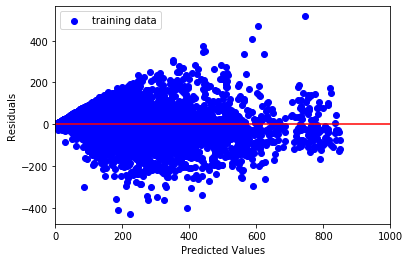

In [76]:
gs = GridSearchCV(regressor, parameters,cv=3,scoring ='neg_mean_absolute_error') 
gs = gs.fit(X_train,y_train)


%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
#plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=1500, color="r")
plt.xlim([0,1000])
plt.show()

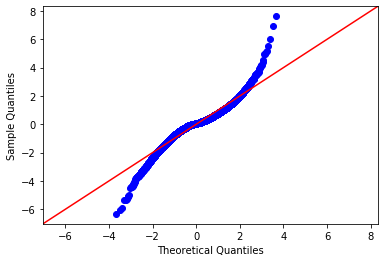

In [33]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test


error_train = np.array(error_train).reshape(-1,1)
scaled_error_train= StandardScaler(copy=False).fit(error_train).transform(error_train).flatten()
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(scaled_error_train,line='45')
plt.show()

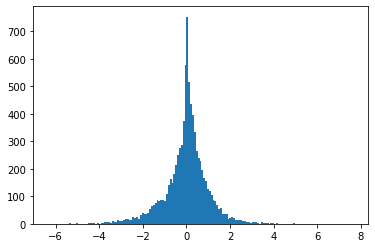

In [34]:
plt.hist(scaled_error_train, bins='auto')  # arguments are passed to np.histogram
plt.show()

In [ ]:
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear','poly'],
             'degree': [2,3]
             }

gs_regression(regressor, parameters)

In [ ]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[1000]}

gs_regression(regressor, parameters)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

# Making the predictions

In [63]:
df2 = pd.read_csv('bike_sharing_predictions.csv')

In [93]:
df2_categorical=df2[['season', 'mnth', 'hr', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']]
df2_numerical=df2[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

dummies2 = pd.get_dummies(df2_categorical.astype(str),drop_first=True) 
df2_numerical=df2_numerical.drop(["temp"], axis=1)

scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

X2_numerical=scaled_df2.iloc[:,:-1]
X2=pd.concat([dummies2,X2_numerical], axis = 1)

y2=df2['cnt']

In [94]:
model = RandomForestRegressor(n_estimators=100, criterion="mse", 
              min_samples_leaf=10)

model.fit(X_train,y_train)
# we could retrain with the entire dataset

y_predictions=model.predict(X2)

In [95]:
y_predictions


array([264.74986498, 209.3707654 , 414.76402617, ..., 174.84068928,
       237.06443889, 129.53619437])

In [96]:
from sklearn import metrics

print("MAE  train %.3f"  % (metrics.mean_absolute_error(y2, y_predictions)) ) 
print("MSE  train %.3f " % (metrics.mean_squared_error(y2, y_predictions)) ) 
print("RMSE train %.3f " % (np.sqrt(metrics.mean_squared_error(y2, y_predictions))) ) 
print("r2   train %.3f " % ( metrics.r2_score(y2, y_predictions)) )


MAE  train 53.551
MSE  train 6188.423 
RMSE train 78.667 
r2   train 0.817 


In [92]:
np.savetxt("model_predictions.csv", y_predictions.astype(int), delimiter=",", fmt='%.0f')